In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
file = r'D:\MS_Courses\3.Fall\Mining\Project\FINAL DATASET\2019\201901-citibike-tripdata.csv'
df = pd.read_csv(file)

In [3]:
df['Start Date'] = pd.to_datetime(df['starttime']).dt.date
df['Start Time'] = pd.to_datetime(df['starttime']).dt.time

df['End Date'] = pd.to_datetime(df['stoptime']).dt.date
df['End Time'] = pd.to_datetime(df['stoptime']).dt.time

In [4]:
file_name = r'D:\MS_Courses\3.Fall\Mining\Project\FINAL DATASET\PROC.csv'
df.to_csv(file_name)

In [5]:
file_name = r'D:\MS_Courses\3.Fall\Mining\Project\FINAL DATASET\PROC.csv'
#cust_file_name = r"D:\MS_Courses\3.Fall\Mining\Project\FINAL DATASET\Cusotmer_Data.csv"
df = pd.read_csv(file_name)

In [6]:
# Extracting Hour

df['Start Hour'] = pd.to_datetime(df['Start Time']).dt.hour
    

df['End Hour'] = pd.to_datetime(df['End Time']).dt.hour

In [7]:
cust_out_file_name = r'D:\MS_Courses\3.Fall\Mining\Project\FINAL DATASET\All_Processed_Hour-NEW.csv'
df.to_csv(cust_out_file_name)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967287 entries, 0 to 967286
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               967287 non-null  int64  
 1   tripduration             967287 non-null  int64  
 2   starttime                967287 non-null  object 
 3   stoptime                 967287 non-null  object 
 4   start station id         967269 non-null  float64
 5   start station name       967269 non-null  object 
 6   start station latitude   967287 non-null  float64
 7   start station longitude  967287 non-null  float64
 8   end station id           967269 non-null  float64
 9   end station name         967269 non-null  object 
 10  end station latitude     967287 non-null  float64
 11  end station longitude    967287 non-null  float64
 12  bikeid                   967287 non-null  int64  
 13  usertype                 967287 non-null  object 
 14  birt

In [9]:
import pandas as pd
cust_out_file_name = r'D:\MS_Courses\3.Fall\Mining\Project\FINAL DATASET\All_Processed_Hour-NEW.csv'
df = pd.read_csv(cust_out_file_name)
df['usertype'].replace(['Customer', 'Subscriber'],
                        [0, 1], inplace=True)
df.to_csv(cust_out_file_name)

In [10]:
ratios={}
for i in range(0,24):
    ratios[i]=(len(df[(df['usertype']==1) & (df['Start Hour']==i)])/len(df[(df['usertype']==0) & (df['Start Hour']==i)]))
print(ratios)
#plt.bar(rartios.keys(), ratios.values(), width, color='g')

{0: 22.318181818181817, 1: 17.190697674418605, 2: 12.134831460674157, 3: 17.38372093023256, 4: 36.41379310344828, 5: 89.61797752808988, 6: 90.73431734317343, 7: 103.63967611336032, 8: 84.66698292220114, 9: 44.616778523489934, 10: 19.620982986767487, 11: 13.796271186440679, 12: 12.844330729868032, 13: 11.735602704593145, 14: 11.678305924757828, 15: 12.797902764537655, 16: 17.315703380588875, 17: 33.036271309394266, 18: 38.218735788995, 19: 33.080712166172106, 20: 25.03728813559322, 21: 23.644382544103994, 22: 22.14909090909091, 23: 19.463587921847246}


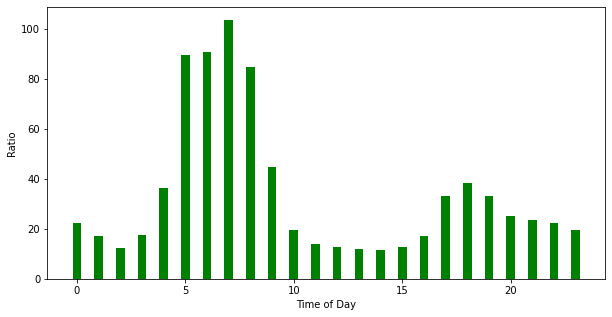

In [27]:
hour = list(ratios.keys())
ratio = list(ratios.values())
#plt.bar(ratios.keys(), ratios.values(),color='g')
fig = plt.figure(figsize = (10, 5))
plt.bar(hour, ratio,width = 0.4,color='g')
 
plt.xlabel("Time of Day")
plt.ylabel("Ratio")
plt.show()

In [12]:
################### VARIANCES ###################
# FIND RATIO FOR EACH HOUR ON EACH DAY OF THE MONTH
# CALCULATE VARIANCE FOR EACH OF THESE HOURS FOR ALL THE DAYS
cust_out_file_name = r'D:\MS_Courses\3.Fall\Mining\Project\FINAL DATASET\All_Processed_Hour-NEW.csv'
df = pd.read_csv(cust_out_file_name)
dates = df['Start Date'].unique()
var_ratio = {}
ratio_hour = {}
nr = []
dr = []
# i = 1
for i in range(24):
    lst = []
    for j in dates:
        try:
            rat = (len(df[(df['usertype']==1) & (df['Start Hour']==i) & (df['Start Date']==j)])/
                    len(df[(df['usertype']==0) & (df['Start Hour']==i) & (df['Start Date']==j)]))
        except ZeroDivisionError:
            rat = 0
        lst.append(rat)
    ratio_hour[i] = lst

In [13]:
std_dev = {}
for i in range(24):
    df1 = pd.DataFrame(ratio_hour[i])
    df1.iloc[0:0]
    
    #print(df1)
    var = df1.var()
    std = df1.std()
    var_ratio[i] = "%.3f" % var
    std_dev[i] = "%.3f" % std
    #print(var)
    #var_ratio[i] = float(var)
    
    #print("%.2f" % a)
    #std_dev[i] = float(std)
print("Variance is:")
var_ratio_sorted = {k: v for k, v in sorted(var_ratio.items(), key=lambda item: item[1])}
#print(var_ratio_sorted)
print(var_ratio)
print("***********************************************************************")
print("Std Dev is:")
std_dev_sorted = {k: v for k, v in sorted(std_dev.items(), key=lambda item: item[1])}
print(std_dev)
# print(std_dev_sorted)

Variance is:
{0: '103.291', 23: '1047.079', 11: '113.420', 20: '133.553', 16: '138.183', 21: '156.801', 10: '192.187', 5: '19505.010', 2: '267.022', 1: '279.027', 22: '311.129', 8: '3368.250', 6: '3397.273', 17: '444.652', 18: '467.021', 3: '468.326', 19: '533.769', 13: '61.958', 7: '6448.237', 12: '75.785', 14: '80.527', 4: '804.332', 15: '93.483', 9: '937.095'}
***********************************************************************
Std Dev is:
{0: '10.163', 11: '10.650', 20: '11.557', 16: '11.755', 21: '12.522', 10: '13.863', 5: '139.660', 2: '16.341', 1: '16.704', 22: '17.639', 17: '21.087', 18: '21.611', 3: '21.641', 19: '23.103', 4: '28.361', 9: '30.612', 23: '32.359', 8: '58.037', 6: '58.286', 13: '7.871', 12: '8.705', 14: '8.974', 7: '80.301', 15: '9.669'}


In [28]:
print("Variance is:")
# var_ratio_sorted = {k: v for k, v in sorted(var_ratio.items(), key=lambda item: item[1])}
#print(var_ratio_sorted)
print(var_ratio)
print("***********************************************************************")
print("Std Dev is:")
# std_dev_sorted = {k: v for k, v in sorted(std_dev.items(), key=lambda item: item[1])}
print(std_dev)
# print(std_dev_sorted)

Variance is:
{0: '103.291', 1: '279.027', 2: '267.022', 3: '468.326', 4: '804.332', 5: '19505.010', 6: '3397.273', 7: '6448.237', 8: '3368.250', 9: '937.095', 10: '192.187', 11: '113.420', 12: '75.785', 13: '61.958', 14: '80.527', 15: '93.483', 16: '138.183', 17: '444.652', 18: '467.021', 19: '533.769', 20: '133.553', 21: '156.801', 22: '311.129', 23: '1047.079'}
***********************************************************************
Std Dev is:
{0: '10.163', 1: '16.704', 2: '16.341', 3: '21.641', 4: '28.361', 5: '139.660', 6: '58.286', 7: '80.301', 8: '58.037', 9: '30.612', 10: '13.863', 11: '10.650', 12: '8.705', 13: '7.871', 14: '8.974', 15: '9.669', 16: '11.755', 17: '21.087', 18: '21.611', 19: '23.103', 20: '11.557', 21: '12.522', 22: '17.639', 23: '32.359'}


In [29]:
a = list(var_ratio.keys())
b = list(var_ratio.values())

In [30]:
print(a,b)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23] ['103.291', '279.027', '267.022', '468.326', '804.332', '19505.010', '3397.273', '6448.237', '3368.250', '937.095', '192.187', '113.420', '75.785', '61.958', '80.527', '93.483', '138.183', '444.652', '467.021', '533.769', '133.553', '156.801', '311.129', '1047.079']


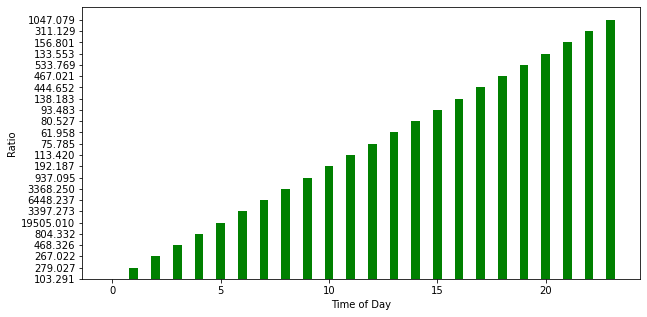

In [34]:
fig = plt.figure(figsize = (10, 5))
plt.bar(a, b,width = 0.4,color='g')
 
plt.xlabel("Time of Day")
plt.ylabel("Ratio")
plt.show()

In [37]:
df = df[0:0]
df = pd. DataFrame({'Hour': a, 'Variance': b})
variance_file = r'D:\MS_Courses\3.Fall\Mining\Project\FINAL DATASET\variance.csv'
df.to_csv(variance_file)